# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import compute_class_weight

# Loading and cleaning data

In [2]:
df = pd.read_csv("../datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)

In [9]:
df["Churn"].replace(to_replace="Yes", value=1, inplace=True)
df["Churn"].replace(to_replace="No", value=0, inplace=True)

/var/folders/lj/b6nh4d2n3_b608c7t9s86ybc0000gn/T/ipykernel_26054/1360780048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Churn"].replace(to_replace="Yes", value=1, inplace=True)
/var/folders/lj/b6nh4d2n3_b608c7t9s86ybc0000gn/T/ipykernel_26054/1360780048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [10]:
df_processing = df.copy()

In [11]:
df_processing = pd.get_dummies(df_processing)
df_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [12]:
df_processing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-nul

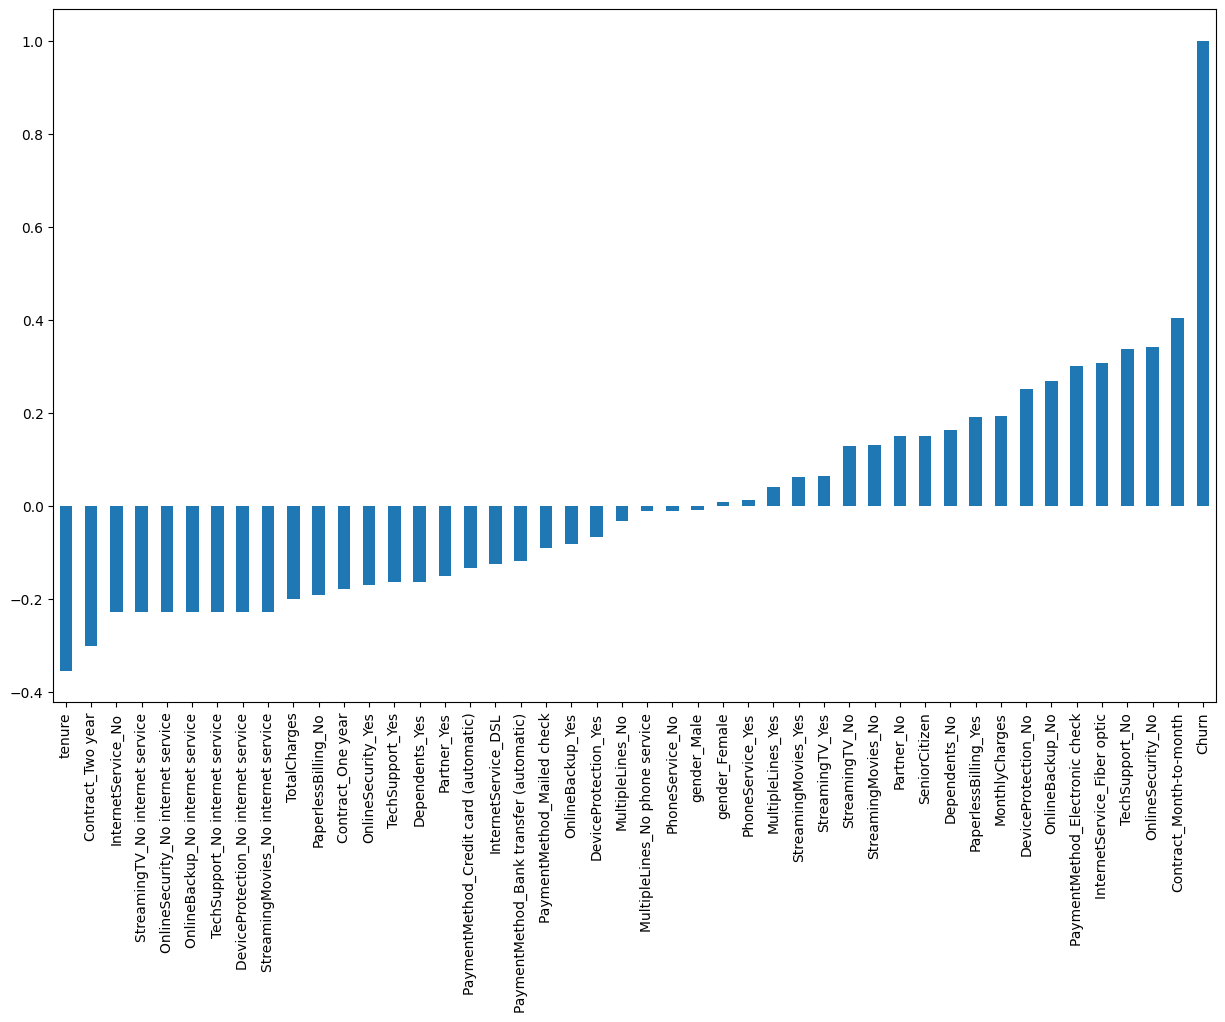

In [13]:
fig = plt.figure(figsize=(15, 9))
df_processing.corr()["Churn"].sort_values(ascending=True).plot(kind="bar")
plt.show()

In [14]:
scaler = MinMaxScaler()
df_processing_scaled = scaler.fit_transform(df_processing)


In [15]:
df_processing_scaled = pd.DataFrame(df_processing_scaled, columns=df_processing.columns)
df_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


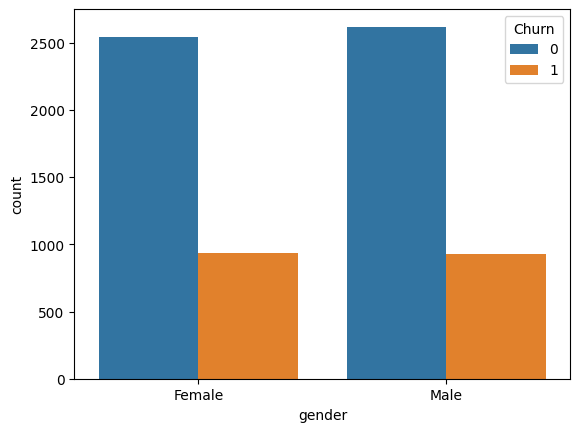

In [16]:
sns.countplot(data=df, x="gender", hue="Churn")
plt.show()

In [17]:
def plot_categorical(column):
    fig = plt.figure(figsize=(5, 5))
    sns.countplot(data=df, x=column, hue="Churn")
    plt.show()

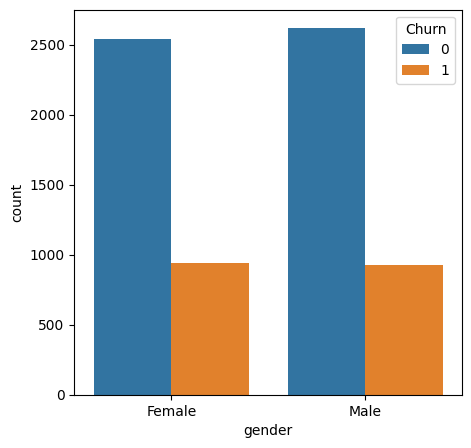

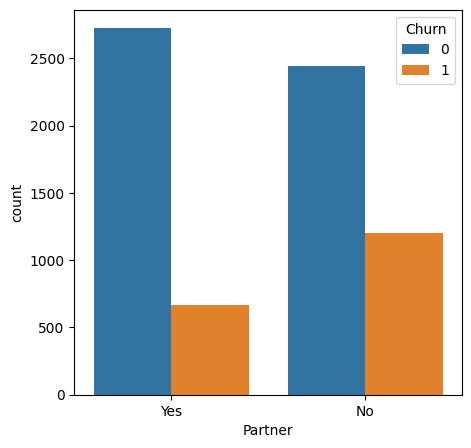

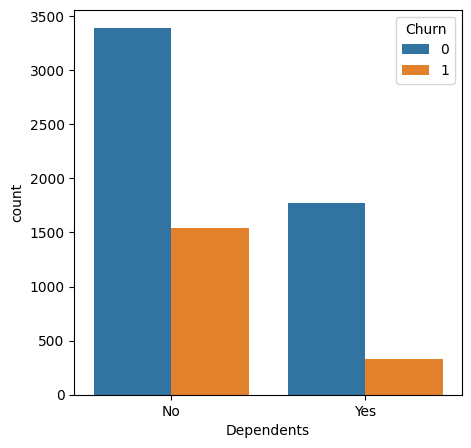

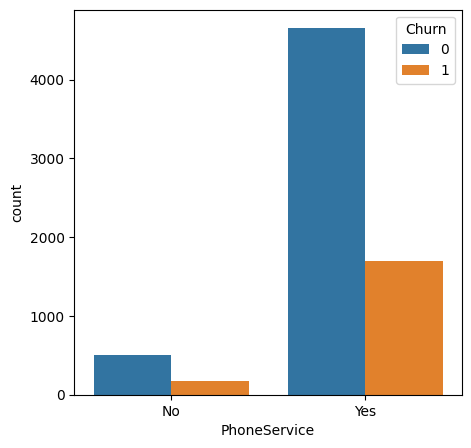

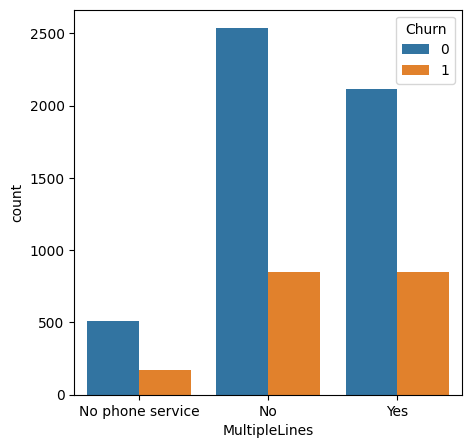

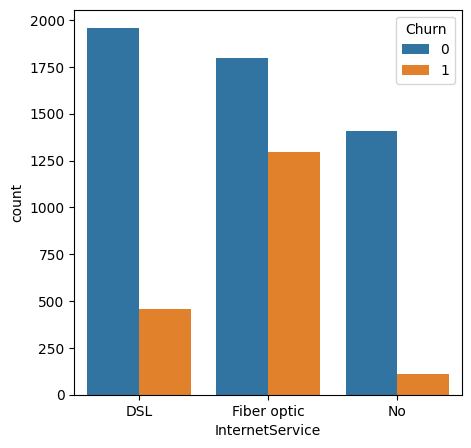

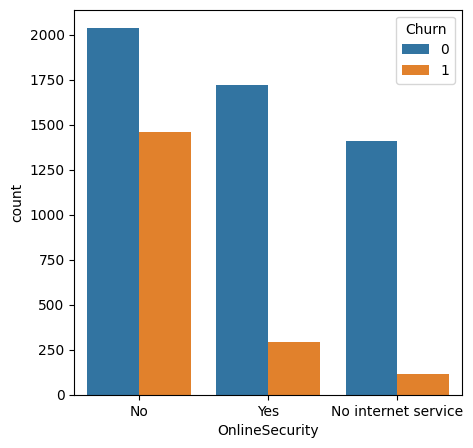

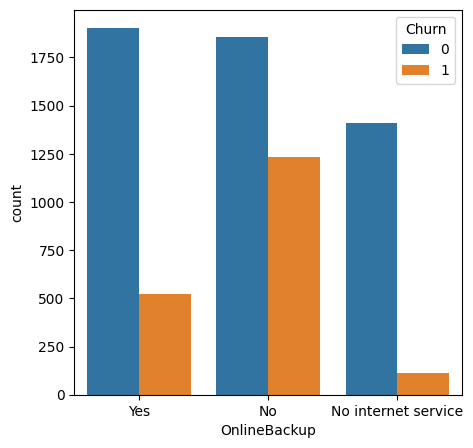

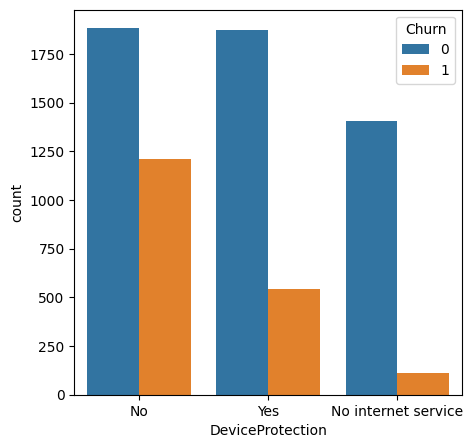

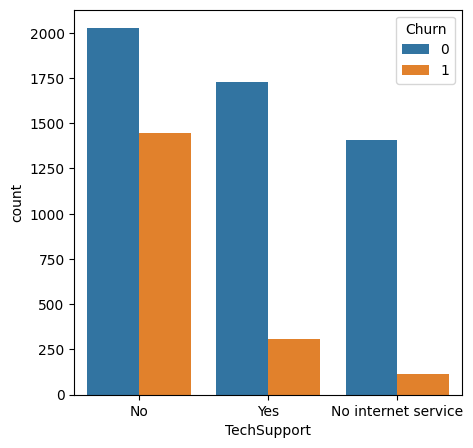

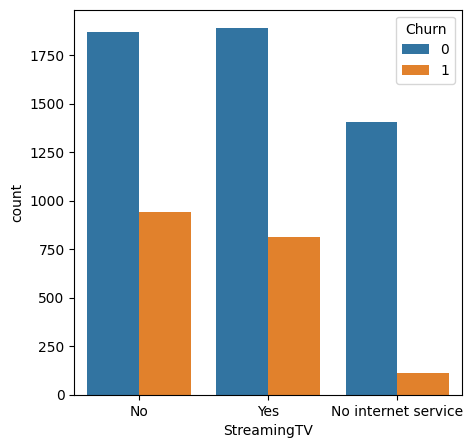

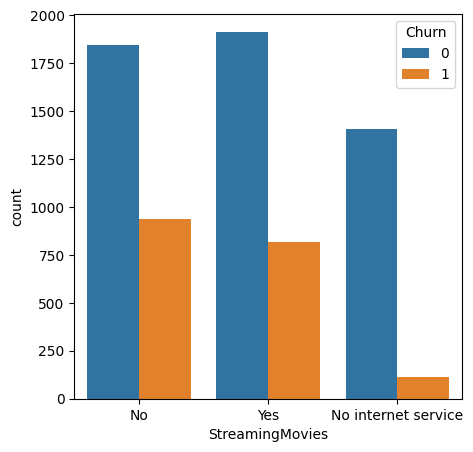

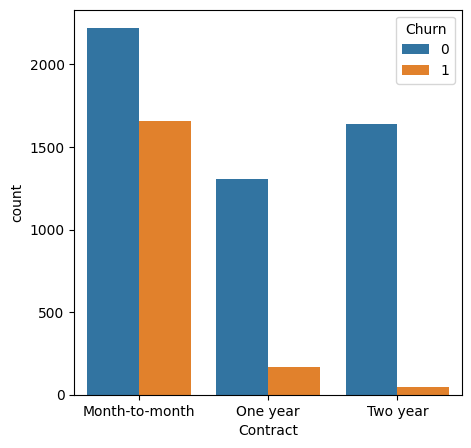

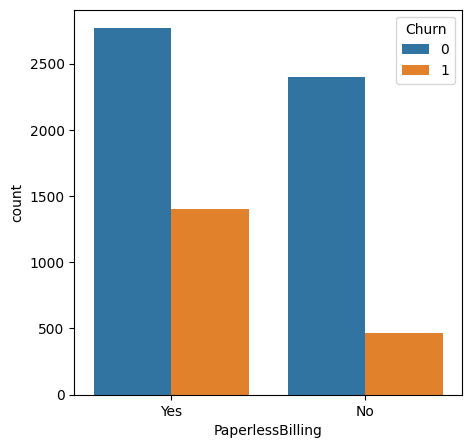

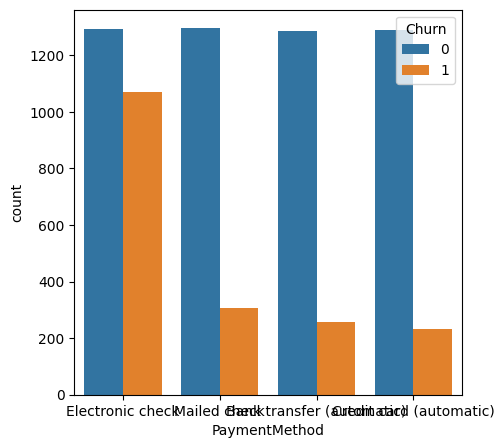

In [18]:
cat_columns = df.select_dtypes(include="object").columns

for col in cat_columns:
    plot_categorical(col)

/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mmenendezg/Developer/Platzi/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mmenendezg/Developer

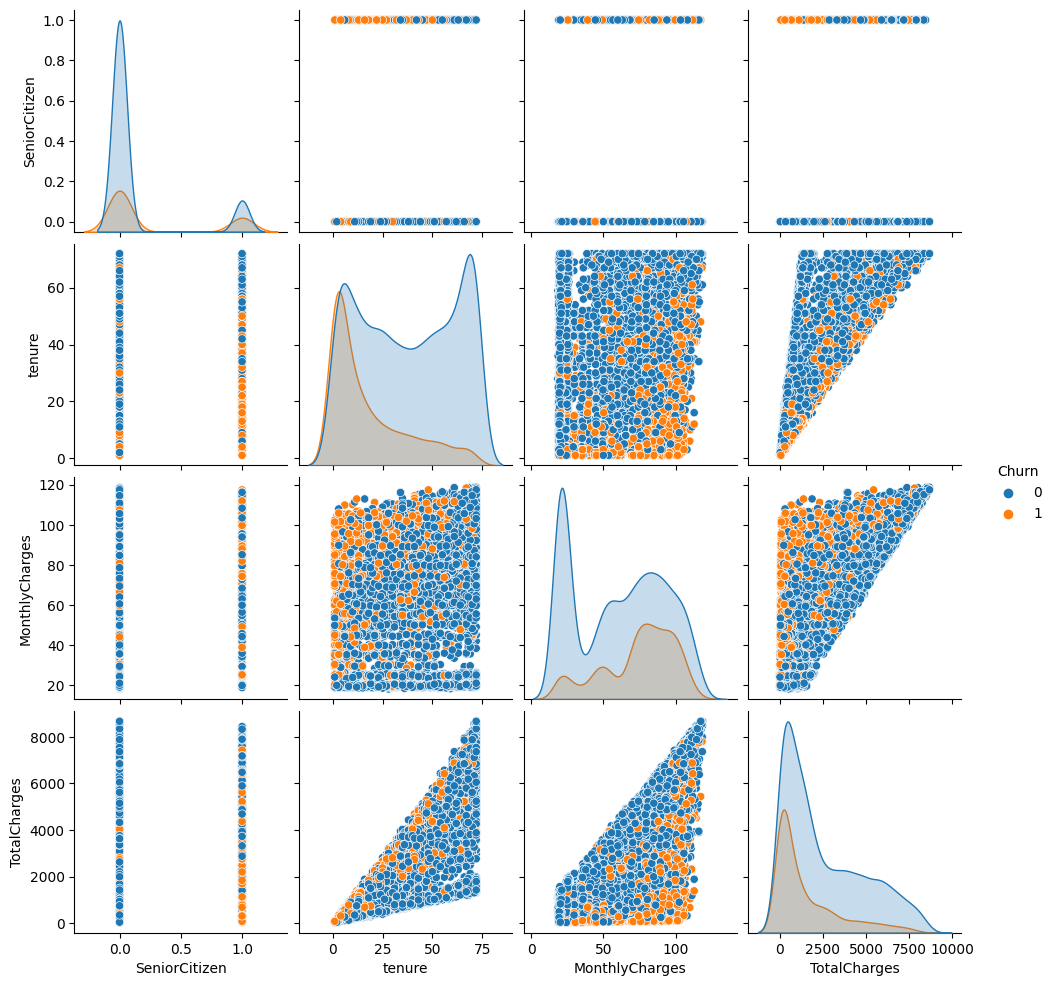

In [19]:
sns.pairplot(data=df, hue="Churn")

# Training The binomial logistic Regression Model

In [20]:
X = df_processing_scaled.drop("Churn", axis=1)
y = df_processing_scaled["Churn"].values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1992)

In [22]:
model = LogisticRegression()
result = model.fit(x_train, y_train)

In [23]:
predictions = model.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predictions) * 100
f1_value = metrics.f1_score(y_test, predictions) * 100
precision = metrics.precision_score(y_test, predictions) * 100
recall = metrics.recall_score(y_test, predictions) * 100
confusion_matrix = metrics.confusion_matrix(y_test, predictions, labels=model.classes_)

# Model Evaluation

In [24]:
model.coef_

array([[ 0.12886015, -2.89981232,  0.03732782,  0.97550125, -0.05175345,
        -0.08502655, -0.06518825, -0.07159176, -0.032207  , -0.104573  ,
         0.10631193, -0.24309193, -0.25860139,  0.10631193,  0.01550946,
        -0.4861138 ,  0.49358447, -0.14425066,  0.20875823, -0.14425066,
        -0.20128757,  0.02543898, -0.14425066, -0.01796831,  0.04020123,
        -0.14425066, -0.03273056,  0.21219342, -0.14425066, -0.20472275,
        -0.06524786, -0.14425066,  0.07271852, -0.10813532, -0.14425066,
         0.11560598,  0.58913679, -0.11806923, -0.60784756, -0.22292204,
         0.08614204, -0.1083522 , -0.14333454,  0.18373578, -0.06882903]])

In [25]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

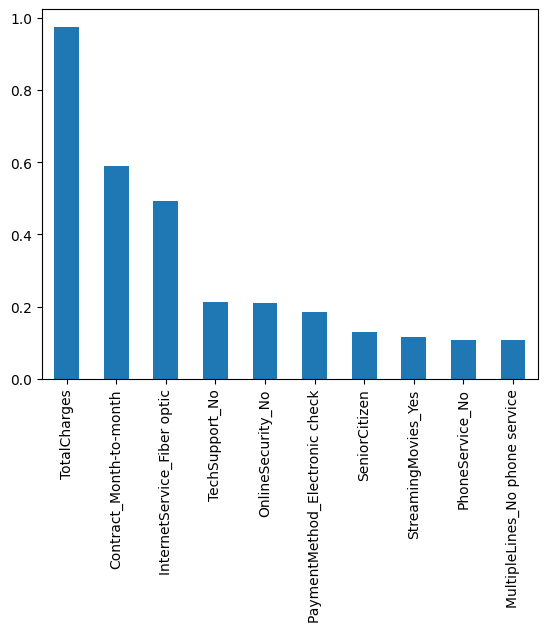

In [26]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

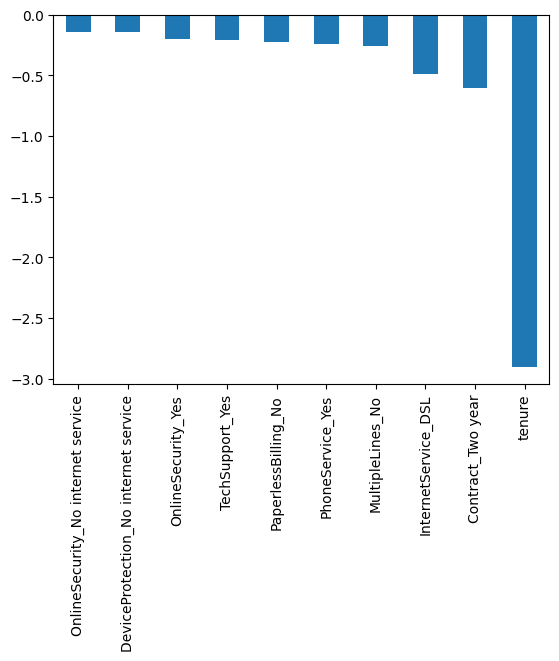

In [27]:
weights.sort_values(ascending=False)[-10:].plot(kind="bar")
plt.show()

Accuracy: 79.7630%
Recall: 51.8707%
Precision: 67.9287%
F1 Score: 58.8235%


<Figure size 1000x1000 with 0 Axes>

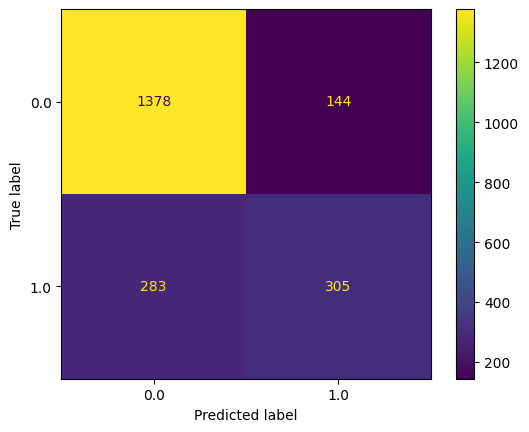

In [28]:
figure = plt.figure(figsize=(10, 10))
print(
    f"""Accuracy: {accuracy:.4f}%\nRecall: {recall:.4f}%\nPrecision: {precision:.4f}%\nF1 Score: {f1_value:.4f}%"""
)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
cm.plot()
plt.show()

## Regularizers

In [29]:
# We obtain the weights of the features
weights = pd.Series(
    model.coef_[0], index=df_processing_scaled.drop("Churn", axis=1).columns.values
)

# We only pull the features with weights above 0.2 or below -0.2
# This is discretional, a different value may work better
useful_features = weights[(weights >= 0.2) | (weights <= -0.2)].index.tolist()
useful_features.extend(["Churn"])
df = df_processing_scaled[useful_features]

# Separate the values into train and test sets
X = df_processing_scaled.drop("Churn", axis=1)
y = df_processing_scaled["Churn"].values
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Since the dataset is inbalanced, lets calculate the weights for each
# class using the `compute_class_weight` function
class_weight = compute_class_weight(
    class_weight="balanced",
    classes=df_processing_scaled["Churn"].unique(),
    y=df_processing_scaled["Churn"],
)
class_weight_dict = {0: class_weight[0], 1: class_weight[1]}

Accuracy: 0.7389
    Recall: 0.8021
    Precision: 0.5056
    F1 Score: 0.6203


<Figure size 1000x1000 with 0 Axes>

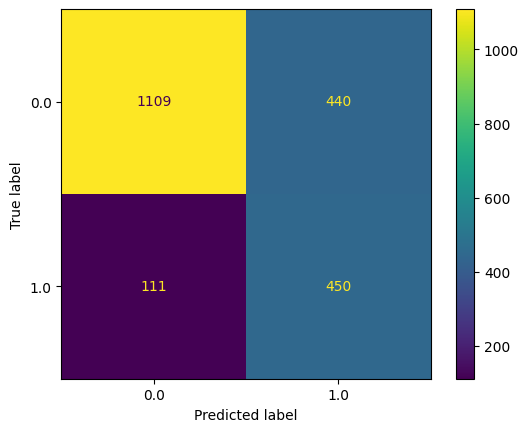

In [41]:
# Train the model with a different regularizer
# Keep in mind that C is the inverse of the regularization strenght
model = LogisticRegression(
    solver="lbfgs",
    penalty="l2",
    C=0.75,
    class_weight=class_weight_dict,
    max_iter=250,
    n_jobs=-1,
)
model.fit(x_train, y_train)

# Evaluate the model
preds = model.predict(x_test)

accuracy_score = metrics.accuracy_score(y_test, preds)
f1_value_score = metrics.f1_score(y_test, preds)
precision_score = metrics.precision_score(y_test, preds)
recall_score = metrics.recall_score(y_test, preds)
confusion_matrix = metrics.confusion_matrix(y_test, preds, labels=model.classes_)

figure = plt.figure(figsize=(10, 10))
print(
    f"""Accuracy: {accuracy_score:.4f}
    Recall: {recall_score:.4f}
    Precision: {precision_score:.4f}
    F1 Score: {f1_value_score:.4f}"""
)
cm = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=model.classes_
)
cm.plot()
plt.show()